<p style="font-family: Arial; font-size:3.75em;color:red; font-style:bold"><br>
Pandas</p><br>

*pandas* is a Python library for data analysis. It offers a number of data exploration, cleaning and transformation operations that are critical in working with data in Python. 

*pandas* build upon *numpy* and *scipy* providing easy-to-use data structures and data manipulation functions with integrated indexing.

The main data structures *pandas* provides are *Series* and *DataFrames*. After a brief introduction to these two data structures and data ingestion, the key features of *pandas* this notebook covers are:
* Generating descriptive statistics on data
* Data cleaning using built in pandas functions
* Frequent data operations for subsetting, filtering, insertion, deletion and aggregation of data
* Merging multiple datasets using dataframes
* Working with timestamps and time-series data

**Additional Recommended Resources:**
* *pandas* Documentation: http://pandas.pydata.org/pandas-docs/stable/
* *Python for Data Analysis* by Wes McKinney
* *Python Data Science Handbook* by Jake VanderPlas

Let's get started with our first *pandas* notebook!

## Import Libraries

In [1]:
import pandas as pd

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Introduction to pandas Data Structures</p>
<br>
<i>*pandas* has two main data structures it uses, namely, *Series* and *DataFrames*. </i>

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
pandas Series</p>

*pandas Series* one-dimensional labeled array. 


In [2]:
ser = pd.Series([100, 'foo', 300, 'bar', 500], ['tom', 'bob', 'nancy', 'dan', 'eric'])

In [3]:
ser

tom      100
bob      foo
nancy    300
dan      bar
eric     500
dtype: object

In [4]:
ser.index

Index(['tom', 'bob', 'nancy', 'dan', 'eric'], dtype='object')

In [5]:
ser.loc[['nancy','bob']]

nancy    300
bob      foo
dtype: object

In [6]:
ser[[4, 3, 1]]

eric    500
dan     bar
bob     foo
dtype: object

In [7]:
ser.iloc[2]

300

In [8]:
'bob' in ser

True

In [9]:
ser

tom      100
bob      foo
nancy    300
dan      bar
eric     500
dtype: object

In [10]:
ser * 2

tom         200
bob      foofoo
nancy       600
dan      barbar
eric       1000
dtype: object

In [11]:
ser[['nancy', 'eric']] ** 2

nancy     90000
eric     250000
dtype: object

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
pandas DataFrame</p>

*pandas DataFrame* is a 2-dimensional labeled data structure.

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Create DataFrame from dictionary of Python Series</p>

In [12]:
d = {'one' : pd.Series([100., 200., 300.], index=['apple', 'ball', 'clock']),
     'two' : pd.Series([111., 222., 333., 4444.], index=['apple', 'ball', 'cerill', 'dancy'])}

In [13]:
df = pd.DataFrame(d)
print(df)

          one     two
apple   100.0   111.0
ball    200.0   222.0
cerill    NaN   333.0
clock   300.0     NaN
dancy     NaN  4444.0


In [14]:
df.index

Index(['apple', 'ball', 'cerill', 'clock', 'dancy'], dtype='object')

In [15]:
df.columns

Index(['one', 'two'], dtype='object')

In [16]:
pd.DataFrame(d, index=['dancy', 'ball', 'apple'])

,one,two
dancy,NaN,4444.0
ball,200.0,222.0
apple,100.0,111.0


In [17]:
pd.DataFrame(d, index=['dancy', 'ball', 'apple'], columns=['two', 'five'])

,two,five
dancy,4444.0,NaN
ball,222.0,NaN
apple,111.0,NaN


<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Create DataFrame from list of Python dictionaries</p>

In [18]:
data = [{'alex': 1, 'joe': 2}, {'ema': 5, 'dora': 10, 'alice': 20}]

In [19]:
pd.DataFrame(data)

,alex,joe,ema,dora,alice
0,1.0,2.0,NaN,NaN,NaN
1,NaN,NaN,5.0,10.0,20.0


In [20]:
pd.DataFrame(data, index=['orange', 'red'])

,alex,joe,ema,dora,alice
orange,1.0,2.0,NaN,NaN,NaN
red,NaN,NaN,5.0,10.0,20.0


In [21]:
pd.DataFrame(data, columns=['joe', 'dora','alice'])

,joe,dora,alice
0,2.0,NaN,NaN
1,NaN,10.0,20.0


<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Basic DataFrame operations</p>

In [22]:
df

,one,two
apple,100.0,111.0
ball,200.0,222.0
cerill,NaN,333.0
clock,300.0,NaN
dancy,NaN,4444.0


In [23]:
df['one']

apple     100.0
ball      200.0
cerill      NaN
clock     300.0
dancy       NaN
Name: one, dtype: float64

In [24]:
df['three'] = df['one'] * df['two']
df

,one,two,three
apple,100.0,111.0,11100.0
ball,200.0,222.0,44400.0
cerill,NaN,333.0,NaN
clock,300.0,NaN,NaN
dancy,NaN,4444.0,NaN


In [25]:
df['flag'] = df['one'] > 250
df

,one,two,three,flag
apple,100.0,111.0,11100.0,False
ball,200.0,222.0,44400.0,False
cerill,NaN,333.0,NaN,False
clock,300.0,NaN,NaN,True
dancy,NaN,4444.0,NaN,False


In [26]:
three = df.pop('three')

In [27]:
three

apple     11100.0
ball      44400.0
cerill        NaN
clock         NaN
dancy         NaN
Name: three, dtype: float64

In [28]:
df

,one,two,flag
apple,100.0,111.0,False
ball,200.0,222.0,False
cerill,NaN,333.0,False
clock,300.0,NaN,True
dancy,NaN,4444.0,False


In [29]:
del df['two']

In [30]:
df

,one,flag
apple,100.0,False
ball,200.0,False
cerill,NaN,False
clock,300.0,True
dancy,NaN,False


In [31]:
df.insert(2, 'copy_of_one', df['one'])
df

,one,flag,copy_of_one
apple,100.0,False,100.0
ball,200.0,False,200.0
cerill,NaN,False,NaN
clock,300.0,True,300.0
dancy,NaN,False,NaN


In [32]:
df['one_upper_half'] = df['one'][:2]
df

,one,flag,copy_of_one,one_upper_half
apple,100.0,False,100.0,100.0
ball,200.0,False,200.0,200.0
cerill,NaN,False,NaN,NaN
clock,300.0,True,300.0,NaN
dancy,NaN,False,NaN,NaN


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Case Study: Movie Data Analysis</p>
<br>This notebook uses a dataset from the MovieLens website. We will describe the dataset further as we explore with it using *pandas*. 

## Download the Dataset

Please note that **you will need to download the dataset**.

Here are the links to the data source and location:
* **Data Source:** MovieLens web site (filename: ml-20m.zip)
* **Location:** https://grouplens.org/datasets/movielens/


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Use Pandas to Read the Dataset<hr>
</p>
<br>
Here, we will be using two CSV files:<br>
<b>ratings.csv :</b> <i>userId, movieId, rating, timestamp</i><br>
<b>movies.csv :</b><i>movieId, title, genres</i><br>

Using the *read_csv* function in pandas, we will ingest these three files.

In [33]:
movies = pd.read_csv('./movielens/movies.csv', sep=',')
print(type(movies))
movies.head(15)

<class 'pandas.core.frame.DataFrame'>


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [34]:
ratings = pd.read_csv('./movielens/ratings.csv', sep=',', parse_dates=['timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [35]:
# For current analysis, we will remove timestamp (we will come back to it!)

del ratings['timestamp']

<h1 style="font-size:2em;color:#2467C0">Data Structures </h1>

<h1 style="font-size:1.5em;color:#2467C0">Series</h1>

In [36]:
#Extract 0th row: notice that it is infact a Series

row_0 = ratings.iloc[0]
type(row_0)

pandas.core.series.Series

In [37]:
print(row_0)

userId      1.0
movieId    31.0
rating      2.5
Name: 0, dtype: float64


In [38]:
row_0.index

Index(['userId', 'movieId', 'rating'], dtype='object')

In [39]:
row_0['userId']

1.0

In [40]:
'rating' in row_0

True

In [41]:
row_0.name

0

In [42]:
row_0 = row_0.rename('first_row')
row_0.name

'first_row'

<h1 style="font-size:1.5em;color:#2467C0">DataFrames </h1>

In [43]:
ratings.head()

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


In [44]:
ratings.index

RangeIndex(start=0, stop=100004, step=1)

In [45]:
ratings.columns

Index(['userId', 'movieId', 'rating'], dtype='object')

In [46]:
# Extract row 0, 11, 2000 from DataFrame

ratings.iloc[ [0,11,2000] ]

,userId,movieId,rating
0,1,31,2.5
11,1,1405,1.0
2000,15,6385,1.5


<h1 style="font-size:2em;color:#2467C0">Descriptive Statistics</h1>

Let's look how the ratings are distributed! 

In [47]:
ratings['rating'].describe()

count    99995.000000
mean         3.543647
std          1.058052
min          0.500000
25%          3.000000
50%          4.000000
75%          4.000000
max          5.000000
Name: rating, dtype: float64

In [48]:
ratings.describe()

,userId,movieId,rating
count,100004.000000,100004.000000,99995.000000
mean,347.011310,12548.664363,3.543647
std,195.163838,26369.198969,1.058052
min,1.000000,1.000000,0.500000
25%,182.000000,1028.000000,3.000000
50%,367.000000,2406.500000,4.000000
75%,520.000000,5418.000000,4.000000
max,671.000000,163949.000000,5.000000


In [49]:
ratings['rating'].mean()

3.543647182359118

In [50]:
ratings.mean()

userId       347.011310
movieId    12548.664363
rating         3.543647
dtype: float64

In [51]:
ratings['rating'].min()

0.5

In [52]:
ratings['rating'].max()

5.0

In [53]:
ratings['rating'].std()

1.0580523083509772

In [54]:
ratings['rating'].mode()

0    4.0
dtype: float64

In [55]:
ratings.corr()

,userId,movieId,rating
userId,1.000000,0.007126,0.010498
movieId,0.007126,1.000000,-0.028857
rating,0.010498,-0.028857,1.000000


In [56]:
filter_1 = ratings['rating'] > 5
print(filter_1)
filter_1.any()

0         False
1         False
2         False
3         False
4         False
          ...  
99999     False
100000    False
100001    False
100002    False
100003    False
Name: rating, Length: 100004, dtype: bool


False

In [57]:
filter_2 = ratings['rating'] > 0
filter_2.all()

False

<h1 style="font-size:2em;color:#2467C0">Data Cleaning: Handling Missing Data</h1>

In [58]:
movies.shape

(9125, 3)

In [59]:
#is any row NULL ?

movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

Thats nice ! No NULL values !

In [60]:
ratings.shape

(100004, 3)

In [61]:
#is any row NULL ?

ratings.isnull().any()

userId     False
movieId    False
rating      True
dtype: bool

We have some ratings which are NULL

In [62]:
ratings = ratings.dropna()

In [63]:
#Check again: is any row NULL ?

ratings.isnull().any()

userId     False
movieId    False
rating     False
dtype: bool

In [64]:
ratings.shape

(99995, 3)

Thats nice ! No NULL values ! Notice the number of lines have reduced.

<h1 style="font-size:2em;color:#2467C0">Data Visualization</h1>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A0BC0AD588>]],
      dtype=object)

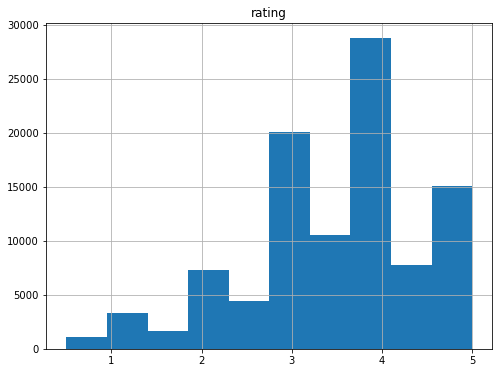

In [65]:
%matplotlib inline

ratings.hist(column='rating', figsize=(8,6))

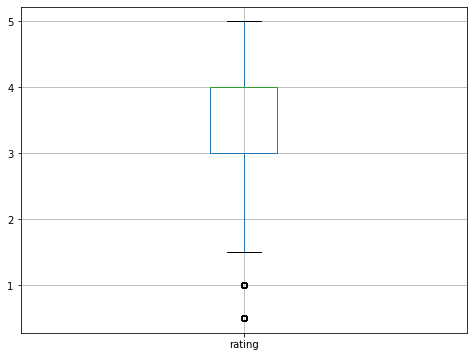

In [66]:
ratings.boxplot(column='rating', figsize=(8,6))

<h1 style="font-size:2em;color:#2467C0">Slicing Out Columns</h1>
 

In [67]:
ratings['rating'].head()

0    2.5
1    3.0
2    3.0
3    2.0
4    4.0
Name: rating, dtype: float64

In [68]:
movies[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [69]:
ratings[-10:]

,userId,movieId,rating
99994,671,5952,5.0
99995,671,5989,4.0
99996,671,5991,4.5
99997,671,5995,4.0
99998,671,6212,2.5
99999,671,6268,2.5
100000,671,6269,4.0
100001,671,6365,4.0
100002,671,6385,2.5
100003,671,6565,3.5


In [70]:
ratings_counts = ratings['rating'].value_counts()
ratings_counts

4.0    28748
3.0    20060
5.0    15094
3.5    10538
4.5     7723
2.0     7270
2.5     4449
1.0     3325
1.5     1687
0.5     1101
Name: rating, dtype: int64

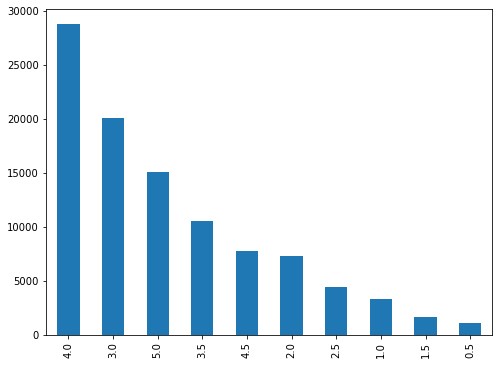

In [71]:
ratings_counts.plot(kind='bar', figsize=(8,6))

<h1 style="font-size:2em;color:#2467C0">Filters for Selecting Rows</h1>

In [72]:
is_highly_rated = ratings['rating'] >= 4.0

ratings[is_highly_rated][30:50]

,userId,movieId,rating
83,2,551,5.0
85,2,585,5.0
89,2,589,5.0
90,2,590,5.0
91,2,592,5.0
94,2,661,4.0
95,2,720,4.0
97,3,110,4.0
100,3,296,4.5
101,3,318,5.0


In [73]:
is_animation = movies['genres'].str.contains('Animation')

movies[is_animation][5:15]

,movieId,title,genres
279,313,"Swan Princess, The (1994)",Animation|Children
328,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
354,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation
494,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
500,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy
521,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
526,594,Snow White and the Seven Dwarfs (1937),Animation|Children|Drama|Fantasy|Musical
527,595,Beauty and the Beast (1991),Animation|Children|Fantasy|Musical|Romance|IMAX
528,596,Pinocchio (1940),Animation|Children|Fantasy|Musical
537,610,Heavy Metal (1981),Action|Adventure|Animation|Horror|Sci-Fi


In [74]:
movies[is_animation].head(15)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12,13,Balto (1995),Adventure|Animation|Children
46,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
211,239,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance
216,244,Gumby: The Movie (1995),Animation|Children
279,313,"Swan Princess, The (1994)",Animation|Children
328,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
354,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation
494,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
500,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy


<h1 style="font-size:2em;color:#2467C0">Group By and Aggregate </h1>

In [75]:
ratings_count = ratings[['movieId','rating']].groupby('rating').count()
ratings_count

,movieId
rating,
0.5,1101
1.0,3325
1.5,1687
2.0,7270
2.5,4449
3.0,20060
3.5,10538
4.0,28748
4.5,7723


In [76]:
average_rating = ratings[['movieId','rating']].groupby('movieId').mean()
average_rating.head()

,rating
movieId,
1,3.872470
2,3.401869
3,3.181034
4,2.384615
5,3.267857


In [77]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.head()

,rating
movieId,
1,247
2,107
3,58
4,13
5,56


In [78]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.tail()

,rating
movieId,
161944,1
162376,1
162542,1
162672,1
163949,1


<h1 style="font-size:2em;color:#2467C0">Merge Dataframes</h1>

In [79]:
ratings.head()

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


In [80]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [81]:
t = movies.merge(ratings, on='movieId', how='inner')
t.head()

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,3.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,9,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13,5.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,3.0


More examples: http://pandas.pydata.org/pandas-docs/stable/merging.html

## Combine aggreagation, merging, and filters to get useful analytics


In [82]:
avg_ratings = ratings.groupby('movieId', as_index=False).mean()
del avg_ratings['userId']
avg_ratings.head()

,movieId,rating
0,1,3.872470
1,2,3.401869
2,3,3.181034
3,4,2.384615
4,5,3.267857


In [83]:
box_office = movies.merge(avg_ratings, on='movieId', how='inner')
box_office.tail()

,movieId,title,genres,rating
9061,161944,The Last Brickmaker in America (2001),Drama,5.0
9062,162376,Stranger Things,Drama,4.5
9063,162542,Rustom (2016),Romance|Thriller,5.0
9064,162672,Mohenjo Daro (2016),Adventure|Drama|Romance,3.0
9065,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary,5.0


In [84]:
is_highly_rated = box_office['rating'] >= 4.0

box_office[is_highly_rated][-5:]

,movieId,title,genres,rating
9055,160718,Piper (2016),Animation,4.0
9061,161944,The Last Brickmaker in America (2001),Drama,5.0
9062,162376,Stranger Things,Drama,4.5
9063,162542,Rustom (2016),Romance|Thriller,5.0
9065,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary,5.0


In [85]:
is_comedy = box_office['genres'].str.contains('Comedy')

box_office[is_comedy][:5]

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.872470
2,3,Grumpier Old Men (1995),Comedy|Romance,3.181034
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.384615
4,5,Father of the Bride Part II (1995),Comedy,3.267857
6,7,Sabrina (1995),Comedy|Romance,3.283019


In [86]:
box_office[is_comedy & is_highly_rated][-5:]

,movieId,title,genres,rating
9019,152081,Zootopia (2016),Action|Adventure|Animation|Children|Comedy,4.0
9023,153584,The Last Days of Emma Blank (2009),Comedy,5.0
9027,156025,Ice Age: The Great Egg-Scapade (2016),Adventure|Animation|Children|Comedy,5.0
9037,158314,Daniel Tosh: Completely Serious (2007),Comedy,4.5
9052,160567,Mike & Dave Need Wedding Dates (2016),Comedy,4.0


<h1 style="font-size:2em;color:#2467C0">Vectorized String Operations</h1>


In [87]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### Split 'genres' into multiple columns


In [88]:
movie_genres = movies['genres'].str.split('|', expand=True)

In [89]:
movie_genres[:10]

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None
5,Action,Crime,Thriller,None,None,None,None,None,None,None
6,Comedy,Romance,None,None,None,None,None,None,None,None
7,Adventure,Children,None,None,None,None,None,None,None,None
8,Action,None,None,None,None,None,None,None,None,None
9,Action,Adventure,Thriller,None,None,None,None,None,None,None


### Add a new column for comedy genre flag


In [90]:
movie_genres['isComedy'] = movies['genres'].str.contains('Comedy')

In [91]:
movie_genres[:10]

,0,1,2,3,4,5,6,7,8,9,isComedy
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None,True
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None,False
2,Comedy,Romance,None,None,None,None,None,None,None,None,True
3,Comedy,Drama,Romance,None,None,None,None,None,None,None,True
4,Comedy,None,None,None,None,None,None,None,None,None,True
5,Action,Crime,Thriller,None,None,None,None,None,None,None,False
6,Comedy,Romance,None,None,None,None,None,None,None,None,True
7,Adventure,Children,None,None,None,None,None,None,None,None,False
8,Action,None,None,None,None,None,None,None,None,None,False
9,Action,Adventure,Thriller,None,None,None,None,None,None,None,False


### Extract year from title e.g. (1995)

In [92]:
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)

In [93]:
movies.tail()

,movieId,title,genres,year
9120,162672,Mohenjo Daro (2016),Adventure|Drama|Romance,2016
9121,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi,2016
9122,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary,2016
9123,164977,The Gay Desperado (1936),Comedy,1936
9124,164979,"Women of '69, Unboxed",Documentary,NaN


<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

More here: http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods
<br> </p>

<h1 style="font-size:2em;color:#2467C0">Parsing Timestamps</h1>

<b>Timestamps are common in sensor data or other time series datasets.
Let us revisit the *tags.csv* dataset and read the timestamps!
</b>

In [94]:
ratings = pd.read_csv('./movielens/ratings.csv', sep=',')

In [95]:
ratings.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

<b>Unix time / POSIX time / epoch time records 
time in seconds <br> since midnight Coordinated Universal Time (UTC) of January 1, 1970
</b>

In [96]:
ratings.head(5)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [97]:
ratings['parsed_time'] = pd.to_datetime(ratings['timestamp'], unit='s')

<b>
Data Type datetime64[ns] maps to either <M8[ns] or >M8[ns] depending on the hardware
</b>

In [98]:
ratings['parsed_time'].dtype

dtype('<M8[ns]')

In [99]:
ratings.head(2)

,userId,movieId,rating,timestamp,parsed_time
0,1,31,2.5,1260759144,2009-12-14 02:52:24
1,1,1029,3.0,1260759179,2009-12-14 02:52:59


<b>Selecting rows based on timestamps
</b>

In [100]:
greater_than_t = ratings['parsed_time'] > '2015-02-01'

selected_rows = ratings[greater_than_t]

ratings.shape, selected_rows.shape

((100004, 5), (12726, 5))

<b>Sorting the table using the timestamps
</b>

In [101]:
ratings.sort_values(by='parsed_time', ascending=True)[:10]

,userId,movieId,rating,timestamp,parsed_time
52635,383,21,3.0,789652009,1995-01-09 11:46:49
52641,383,47,5.0,789652009,1995-01-09 11:46:49
52684,383,1079,3.0,789652009,1995-01-09 11:46:49
56907,409,21,5.0,828212412,1996-03-30 19:00:12
56909,409,25,4.0,828212412,1996-03-30 19:00:12
56910,409,30,5.0,828212412,1996-03-30 19:00:12
56911,409,32,3.0,828212412,1996-03-30 19:00:12
56913,409,35,4.0,828212412,1996-03-30 19:00:12
56917,409,85,5.0,828212412,1996-03-30 19:00:12
56906,409,16,4.0,828212412,1996-03-30 19:00:12


<h1 style="font-size:2em;color:#2467C0">Average Movie Ratings over Time </h1>

## Are Movie ratings related to the year of launch?

In [102]:
average_rating = ratings[['movieId','rating']].groupby('movieId', as_index=False).mean()
average_rating.tail()

,movieId,rating
9061,161944,5.0
9062,162376,4.5
9063,162542,5.0
9064,162672,3.0
9065,163949,5.0


In [103]:
joined = movies.merge(average_rating, on='movieId', how='inner')
joined.head()
joined.corr()

,movieId,rating
movieId,1.000000,-0.041205
rating,-0.041205,1.000000


In [104]:
yearly_average = joined[['year','rating']].groupby('year', as_index=False).mean()
yearly_average[:10]

,year,rating
0,1902,4.333333
1,1915,3.000000
2,1916,3.500000
3,1917,4.250000
4,1918,4.250000
5,1919,3.000000
6,1920,2.500000
7,1921,4.387500
8,1922,3.926587
9,1923,4.166667


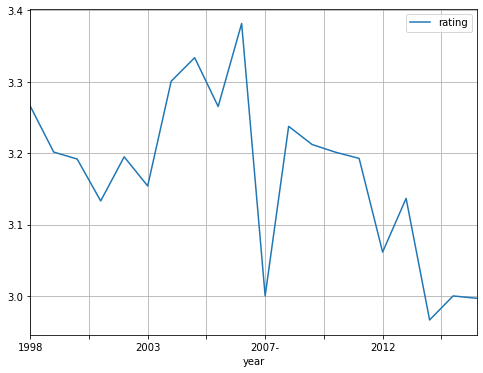

In [105]:
yearly_average[-20:].plot(x='year', y='rating', figsize=(8,6), grid=True)

## This is how we can use pandas